<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Bubble Plots**


Estimated time needed: **30** minutes


In this lab, you will focus on visualizing data.

The dataset will be directly loaded into pandas for analysis and visualization.

You will use various visualization techniques to explore the data and uncover key trends.


## Objectives


In this lab, you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two data features.

-   Visualize composition of data.

-   Visualize comparison of data.


#### Setup: Working with the Database
**Install and import the needed libraries**


In [1]:
!pip install pandas 
!pip install matplotlib

import pandas as pd
import matplotlib.pyplot as plt

**Download and connect to the database file containing survey data.**


To start, download and load the dataset into a `pandas` DataFrame.



In [2]:
# Step 1: Download the dataset
!wget -O survey-data.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

# Load the data
df = pd.read_csv("survey-data.csv")

# Display the first few rows of the data to understand its structure
df.head()


--2026-02-17 20:33:26--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv’

survey-data.csv     100%[===================>] 152.13M  39.3MB/s    in 3.9s    

2026-02-17 20:33:30 (38.7 MB/s) - ‘survey-data.csv’ saved [159525875/159525875]



,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Task 1: Exploring Data Distributions Using Bubble Plots


#### 1. Bubble Plot for Age vs. Frequency of Participation


- Visualize the relationship between respondents’ age and their participation frequency (`SOPartFreq`) using a bubble plot.

- Use the size of the bubbles to represent their job satisfaction (`JobSat`).


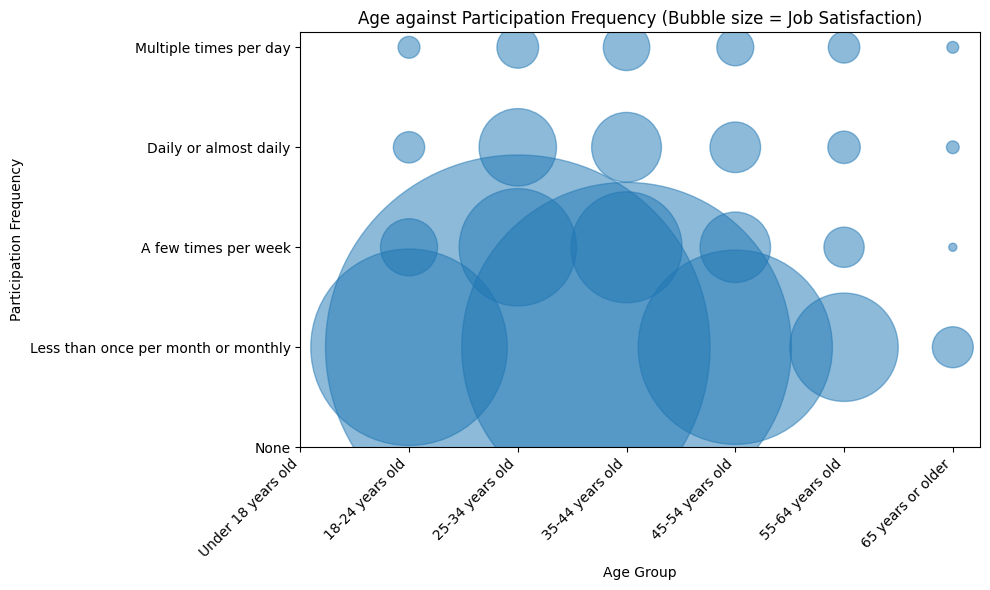

In [3]:
df_age_freq = df[['Age', 'SOPartFreq', 'JobSat']]

df_age_freq = df_age_freq.dropna() # drop nulls
df_age_freq = df_age_freq[df_age_freq['Age'] != 'Prefer not to say'] # drop age where no answer given

# rename age
df_age_freq['Age'] = df_age_freq['Age'].replace({
    'Under 18 years old':
        '0-17 years old'
})

age_mapping = {
    'Under 18 years old': 1,
    '18-24 years old': 2,
    '25-34 years old': 3,
    '35-44 years old': 4,
    '45-54 years old': 5,
    '55-64 years old': 6,
    '65 years or older': 7
}

df_age_freq['Age_order'] = df_age_freq['Age'].map(age_mapping) # create new column with age code

freq_mapping = {
    "None": 1,
    "Less than once per month or monthly": 2,
    "A few times per week": 3,
    "Daily or almost daily": 4,
    "Multiple times per day": 5
}

df_age_freq['Freq_order'] = df_age_freq['SOPartFreq'].map(freq_mapping) # create new column with freq code

df_age_freq = (
    df_age_freq
    .groupby(["Age_order", "Freq_order"])
    .agg(
        avg_jobsat=("JobSat", "mean"),
        count=("JobSat", "size")
    )
    .reset_index()
)

# create scatter
plt.figure(figsize=(10, 6))

plt.scatter(
    df_age_freq["Age_order"],
    df_age_freq["Freq_order"],
    s=df_age_freq["avg_jobsat"] * df_age_freq["count"] * 2, # double size to emphasise differences
    alpha=0.5
)

plt.xlabel("Age Group")
plt.ylabel("Participation Frequency")
plt.title("Age against Participation Frequency (Bubble size = Job Satisfaction)")

plt.xticks(list(age_mapping.values()), list(age_mapping.keys()), rotation=45, ha="right")
plt.yticks(list(freq_mapping.values()), list(freq_mapping.keys()))

plt.tight_layout()
plt.show()

#### 2. Bubble Plot for Compensation vs. Job Satisfaction


-Visualize the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSat`).

- Use the size of the bubbles to represent respondents’ age.


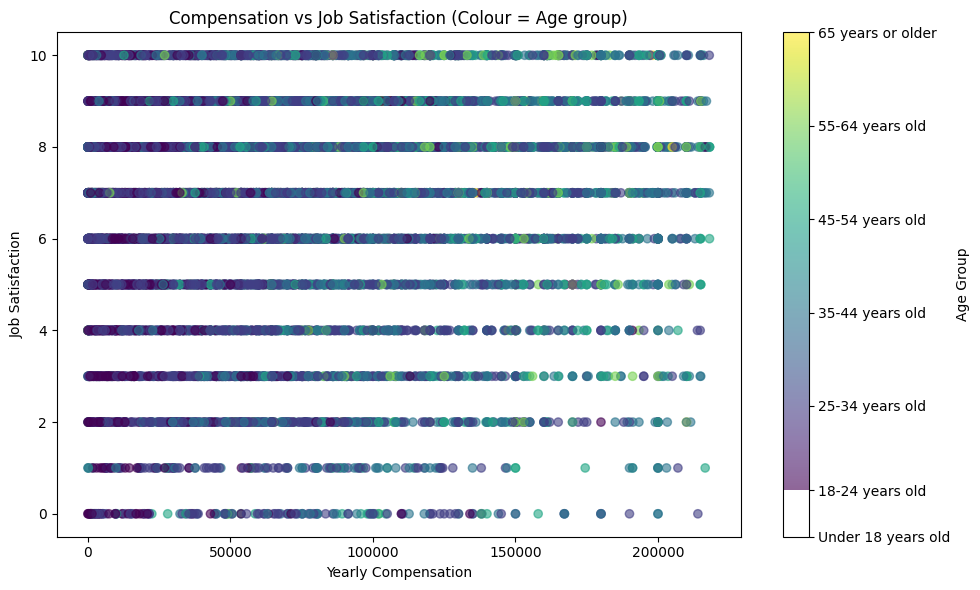

In [4]:
df_comp_sat = df[['ConvertedCompYearly', 'JobSat', 'Age']]

df_comp_sat = df_comp_sat.dropna() # drop nulls
df_comp_sat = df_comp_sat[df_comp_sat['Age'] != 'Prefer not to say'] # drop age where no answer given

# rename age
df_comp_sat['Age'] = df_comp_sat['Age'].replace({
    'Under 18 years old':
        '0-17 years old'
})

upper  = df_comp_sat['ConvertedCompYearly'].quantile(0.75) + 1.5 * (df_comp_sat['ConvertedCompYearly'].quantile(0.75) - df_comp_sat['ConvertedCompYearly'].quantile(0.25)) # set upper limit of interquartile range
df_comp_sat = df_comp_sat[df_comp_sat['ConvertedCompYearly'] <= upper] # exclude CompTotal where it is above the upper limit of the interquartile range

age_mapping = {
    'Under 18 years old': 16,
    '18-24 years old': 21,
    '25-34 years old': 30,
    '35-44 years old': 40,
    '45-54 years old': 50,
    '55-64 years old': 60,
    '65 years or older': 70
}

df_comp_sat['Age_numeric'] = df_comp_sat['Age'].map(age_mapping) # create new column with age code


# create scatter
plt.figure(figsize=(10, 6))

scatter = plt.scatter(
    df_comp_sat["ConvertedCompYearly"],
    df_comp_sat["JobSat"],
    c=df_comp_sat["Age_numeric"],
    alpha=0.6
)

plt.xlabel("Yearly Compensation")
plt.ylabel("Job Satisfaction")
plt.title("Compensation vs Job Satisfaction (Colour = Age group)")

cbar = plt.colorbar(scatter)
cbar.set_ticks(list(age_mapping.values()))
cbar.set_ticklabels(list(age_mapping.keys()))
cbar.set_label("Age Group")

plt.tight_layout()
plt.show()

### Task 2: Analyzing Relationships Using Bubble Plots


#### 1. Bubble Plot of Technology Preferences by Age

- Visualize the popularity of programming languages respondents have worked with (`LanguageHaveWorkedWith`) across age groups.

- Use bubble size to represent the frequency of each language.



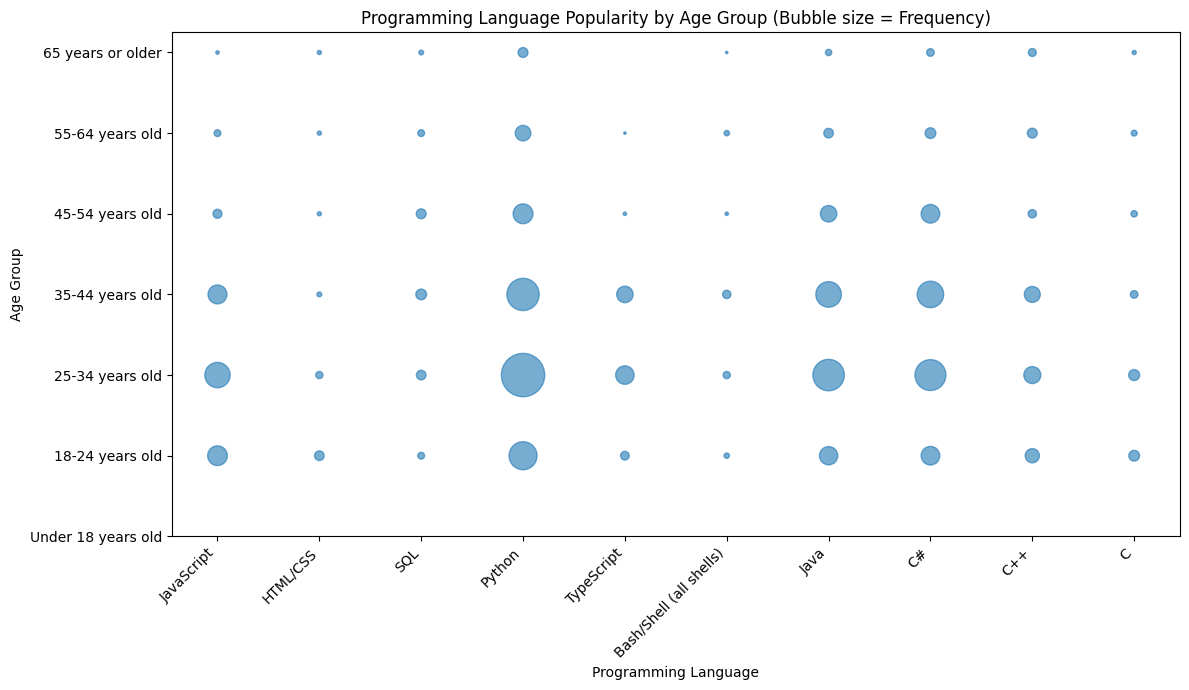

In [5]:
df_lang_age = df[['LanguageHaveWorkedWith', 'Age']]

df_lang_age = df_lang_age.dropna() # drop nulls
df_lang_age = df_lang_age[df_lang_age['Age'] != 'Prefer not to say'] # drop age where no answer given

# rename age
df_lang_age['Age'] = df_lang_age['Age'].replace({
    'Under 18 years old':
        '0-17 years old'
})

# split, explode and count languages
lang_counts = (
    df_lang_age['LanguageHaveWorkedWith']
    .str.split(';')
    .explode()
    .str.strip()        # clean whitespace
    .value_counts()
    .head(10)
    .index
)

df_lang_age = df_lang_age[df_lang_age['LanguageHaveWorkedWith'].isin(lang_counts)] # retain top 10 languages

# create numerical codes for age and language
age_mapping = {
    "Under 18 years old": 1,
    "18-24 years old": 2,
    "25-34 years old": 3,
    "35-44 years old": 4,
    "45-54 years old": 5,
    "55-64 years old": 6,
    "65 years or older": 7
}

df_lang_age["Age_order"] = df_lang_age["Age"].map(age_mapping)

lang_codes = {lang: i+1 for i, lang in enumerate(lang_counts)}
df_lang_age["Lang_order"] = df_lang_age["LanguageHaveWorkedWith"].map(lang_codes)

# create counts
df_lang_age = (
    df_lang_age
    .groupby(["LanguageHaveWorkedWith", "Age_order", "Lang_order"])
    .size()
    .reset_index(name="count")
)

# create bubble chart
plt.figure(figsize=(12, 7))

plt.scatter(
    df_lang_age["Lang_order"],
    df_lang_age["Age_order"],
    s=df_lang_age["count"] * 3, # double count to differentiate bubble sizes
    alpha=0.6
)

plt.xticks(list(lang_codes.values()), list(lang_codes.keys()), rotation=45, ha="right")
plt.yticks(list(age_mapping.values()), list(age_mapping.keys()))
plt.xlabel("Programming Language")
plt.ylabel("Age Group")
plt.title("Programming Language Popularity by Age Group (Bubble size = Frequency)")

plt.tight_layout()
plt.show()

#### 2. Bubble Plot for Preferred Databases vs. Job Satisfaction

- Explore the relationship between preferred databases (`DatabaseWantToWorkWith`) and job satisfaction.

- Use bubble size to indicate the number of respondents for each database.


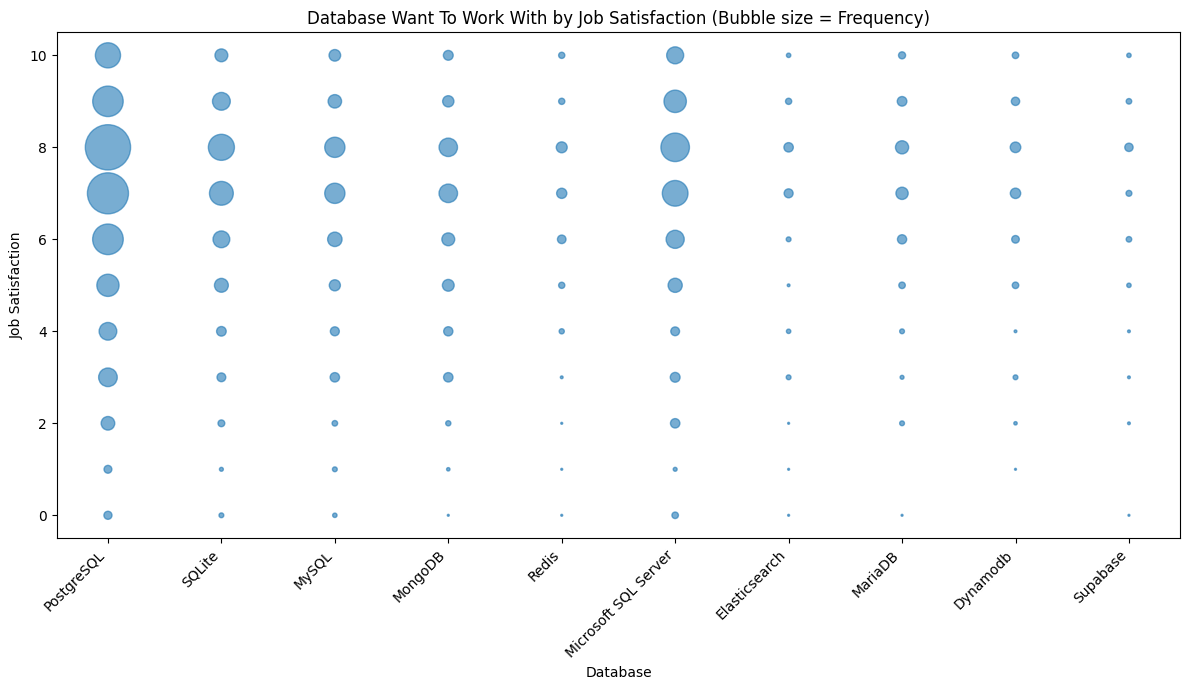

In [6]:
df_db_satis = df[['DatabaseWantToWorkWith', 'JobSat']]

# split, explode and count databases
db_counts = (
    df_db_satis['DatabaseWantToWorkWith']
    .str.split(';')
    .explode()
    .str.strip()        # clean whitespace
    .value_counts()
    .head(10)
    .index
)

df_db_satis = df_db_satis[df_db_satis['DatabaseWantToWorkWith'].isin(db_counts)] # retain top 10 databases

# create numerical codes for db
db_codes = {db: i+1 for i, db in enumerate(db_counts)}
df_db_satis["db_order"] = df_db_satis["DatabaseWantToWorkWith"].map(db_codes)

df_db_satis = df_db_satis.dropna() # drop nulls

# create counts
df_db_satis = (
    df_db_satis
    .groupby(["db_order", "JobSat"])
    .size()
    .reset_index(name="count")
)

# create bubble chart
plt.figure(figsize=(12, 7))

plt.scatter(
    df_db_satis["db_order"],
    df_db_satis["JobSat"],
    s=df_db_satis["count"] * 2, # double count to differentiate bubble sizes
    alpha=0.6
)

plt.xticks(list(db_codes.values()), list(db_codes.keys()), rotation=45, ha="right")
plt.xlabel("Database")
plt.ylabel("Job Satisfaction")
plt.title("Database Want To Work With by Job Satisfaction (Bubble size = Frequency)")

plt.tight_layout()
plt.show()

### Task 3: Comparing Data Using Bubble Plots


#### 1. Bubble Plot for Compensation Across Developer Roles

- Visualize compensation (`ConvertedCompYearly`) across different developer roles (`DevType`).

- Use bubble size to represent job satisfaction.


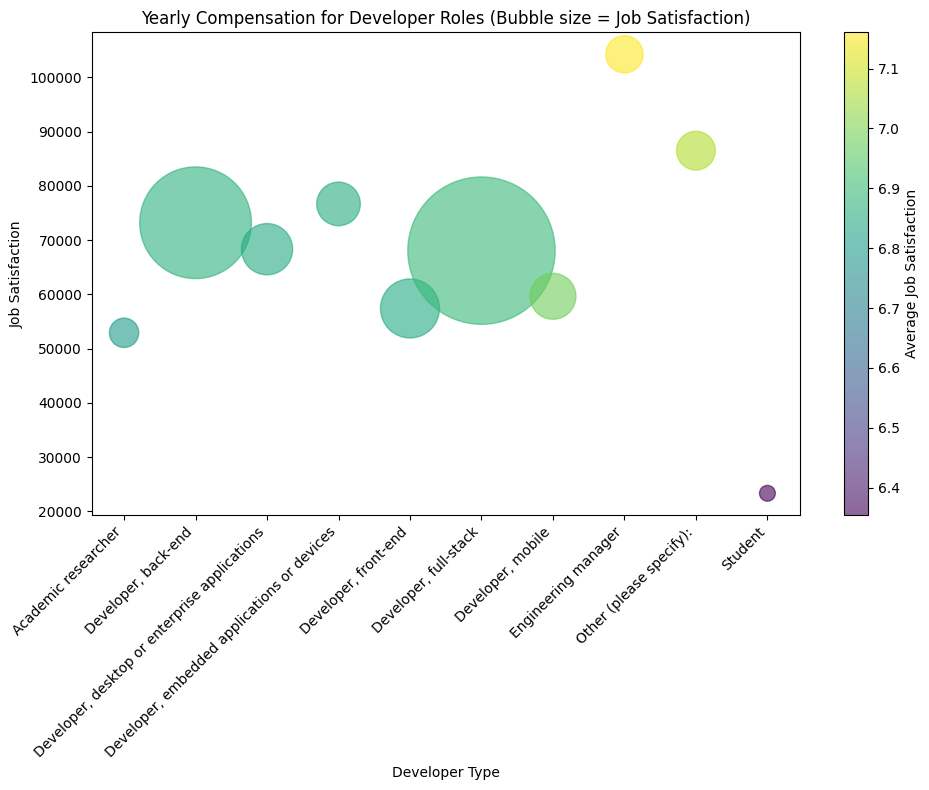

In [7]:
df_conv_dev = df[['ConvertedCompYearly', 'DevType', 'JobSat']]

# split, explode and count databases
dev_counts = (
    df_conv_dev['DevType']
    .str.split(';')
    .explode()
    .str.strip()        # clean whitespace
    .value_counts()
    .head(10)
    .index
)

df_conv_dev = df_conv_dev[df_conv_dev['DevType'].isin(dev_counts)] # retain top 10 databases

upper  = df_conv_dev['ConvertedCompYearly'].quantile(0.75) + 1.5 * (df_conv_dev['ConvertedCompYearly'].quantile(0.75) - df_conv_dev['ConvertedCompYearly'].quantile(0.25)) # set upper limit of interquartile range
df_conv_dev = df_conv_dev[df_conv_dev['ConvertedCompYearly'] <= upper] # exclude CompTotal where it is above the upper limit of the interquartile range

df_conv_dev = df_conv_dev.dropna() # drop nulls

# create counts
df_conv_dev = (
    df_conv_dev
    .groupby("DevType")
    .agg(
        avg_comp=("ConvertedCompYearly", "mean"),
        avg_jobsat=("JobSat", "mean"),
        count=("JobSat", "size")
    )
    .reset_index()
)

# create bubble chart
plt.figure(figsize=(10, 8))

conv_dev = plt.scatter(
    df_conv_dev["DevType"],
    df_conv_dev["avg_comp"],
    s=df_conv_dev["count"] * 2, # double count to differentiate bubble sizes
    c=df_conv_dev["avg_jobsat"],
    alpha=0.6
)

plt.xticks(rotation=45, ha="right")
plt.xlabel("Developer Type")
plt.ylabel("Job Satisfaction")
plt.title("Yearly Compensation for Developer Roles (Bubble size = Job Satisfaction)")

cbar = plt.colorbar(conv_dev)
cbar.set_label("Average Job Satisfaction")

plt.tight_layout()
plt.show()

#### 2. Bubble Plot for Collaboration Tools by Age

- Visualize the relationship between the collaboration tools used (`NEWCollabToolsHaveWorkedWith`) and age groups.

- Use bubble size to represent the frequency of tool usage.


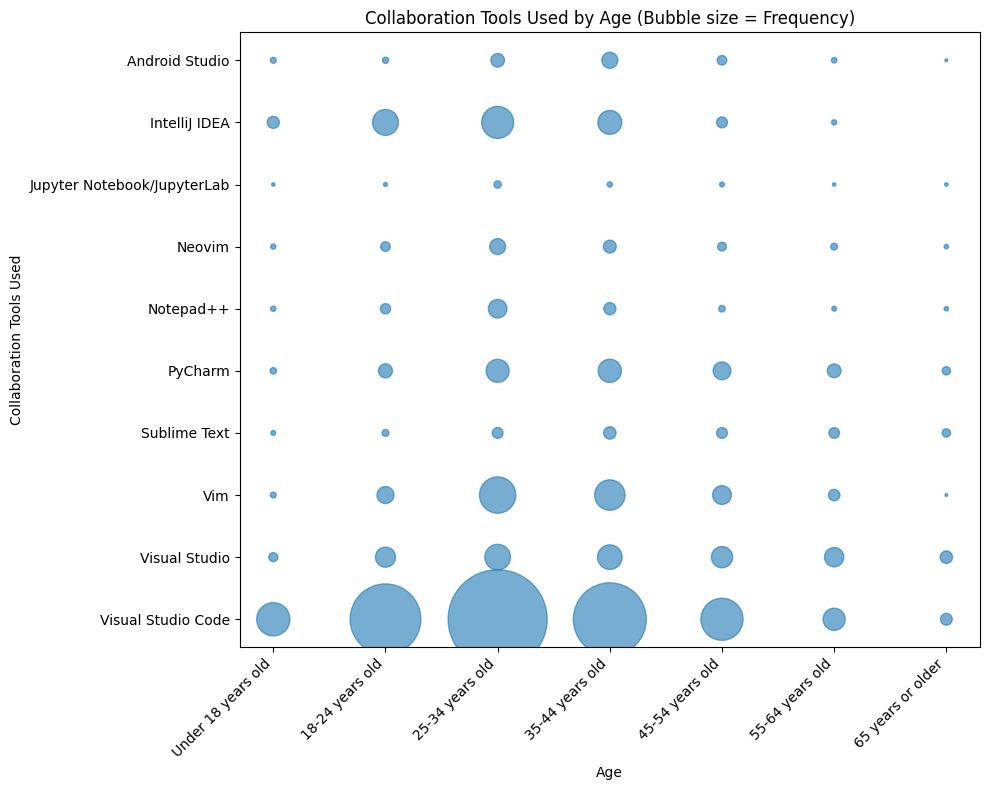

In [8]:
df_tool_age = df[['NEWCollabToolsHaveWorkedWith', 'Age']]

# split, explode and count tools
tool_counts = (
    df_tool_age['NEWCollabToolsHaveWorkedWith']
    .str.split(';')
    .explode()
    .str.strip()        # clean whitespace
    .value_counts()
    .head(10)
    .index
)

df_tool_age = df_tool_age[df_tool_age['NEWCollabToolsHaveWorkedWith'].isin(tool_counts)] # retain top 10 databases

tool_codes = {tool: i+1 for i, tool in enumerate(tool_counts)}
df_tool_age["Tool_order"] = df_tool_age["NEWCollabToolsHaveWorkedWith"].map(tool_codes)

tool_mapping = {
    "Android Studio": 10,
    "IntelliJ IDEA": 9,
    "Jupyter Notebook/JupyterLab": 8,
    "Neovim": 7,
    "Notepad++": 6,
    "PyCharm": 5,
    "Sublime Text": 4,
    "Vim": 3,
    "Visual Studio": 2,
    "Visual Studio Code": 1
}

# create numerical codes for age and language
age_mapping = {
    "Under 18 years old": 1,
    "18-24 years old": 2,
    "25-34 years old": 3,
    "35-44 years old": 4,
    "45-54 years old": 5,
    "55-64 years old": 6,
    "65 years or older": 7
}

df_tool_age["Age_order"] = df_tool_age["Age"].map(age_mapping)

df_tool_age = df_tool_age.dropna() # drop nulls

# create counts
df_tool_age = (
    df_tool_age
    .groupby(['Tool_order', 'Age_order'])
    .agg(
        count=('Tool_order', 'size')
    )
    .reset_index()
)

# create bubble chart
plt.figure(figsize=(10, 8))

tool_age = plt.scatter(
    df_tool_age["Age_order"],
    df_tool_age["Tool_order"],
    s=df_tool_age["count"] * 2, # double count to differentiate bubble sizes
    alpha=0.6
)

plt.xticks(list(age_mapping.values()), list(age_mapping.keys()), rotation=45, ha="right")
plt.yticks(list(tool_mapping.values()), list(tool_mapping.keys()))
plt.xlabel("Age")
plt.ylabel("Collaboration Tools Used")
plt.title("Collaboration Tools Used by Age (Bubble size = Frequency)")

plt.tight_layout()
plt.show()

### Task 4: Visualizing Technology Trends Using Bubble Plots


#### 1. Bubble Plot for Preferred Web Frameworks vs. Job Satisfaction

- Explore the relationship between preferred web frameworks (`WebframeWantToWorkWith`) and job satisfaction.

- Use bubble size to represent the number of respondents.



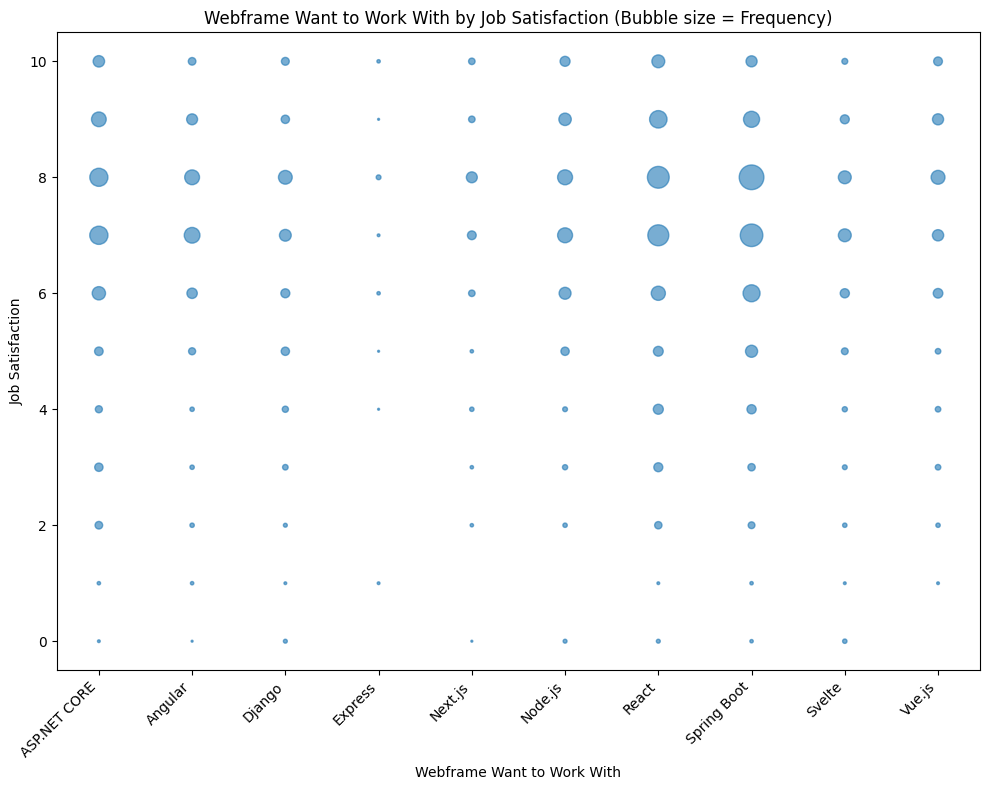

In [9]:
df_want_sat = df[['WebframeWantToWorkWith', 'JobSat']]

# split, explode and count tools
want_counts = (
    df_want_sat['WebframeWantToWorkWith']
    .str.split(';')
    .explode()
    .str.strip()        # clean whitespace
    .value_counts()
    .head(10)
    .index
)

df_want_sat = df_want_sat[df_want_sat['WebframeWantToWorkWith'].isin(want_counts)] # retain top 10 databases

want_order = {
    "ASP.NET CORE": 1,
    "Angular": 2,
    "Django": 3,
    "Express": 4,
    "Next.js": 5,
    "Node.js": 6,
    "React": 7,
    "Spring Boot": 8,
    "Svelte": 9,
    "Vue.js": 10
}

df_want_sat["Want_order"] = df_want_sat["WebframeWantToWorkWith"].map(want_order)

df_want_sat = df_want_sat.dropna() # drop nulls

# create counts
df_want_sat = (
    df_want_sat
    .groupby(['Want_order', 'JobSat'])
    .agg(
        count=('Want_order', 'size')
    )
    .reset_index()
)

# create bubble chart
plt.figure(figsize=(10, 8))

want_sat = plt.scatter(
    df_want_sat["Want_order"],
    df_want_sat["JobSat"],
    s=df_want_sat["count"] * 2, # double count to differentiate bubble sizes
    alpha=0.6
)

plt.xticks(list(want_order.values()), list(want_order.keys()), rotation=45, ha="right")
#plt.yticks(list(tool_mapping.values()), list(tool_mapping.keys()))
plt.xlabel("Webframe Want to Work With")
plt.ylabel("Job Satisfaction")
plt.title("Webframe Want to Work With by Job Satisfaction (Bubble size = Frequency)")

plt.tight_layout()
plt.show()

#### 2. Bubble Plot for Admired Technologies Across Countries

- Visualize the distribution of admired technologies (`LanguageAdmired`) across different countries (`Country`).

- Use bubble size to represent the frequency of admiration.



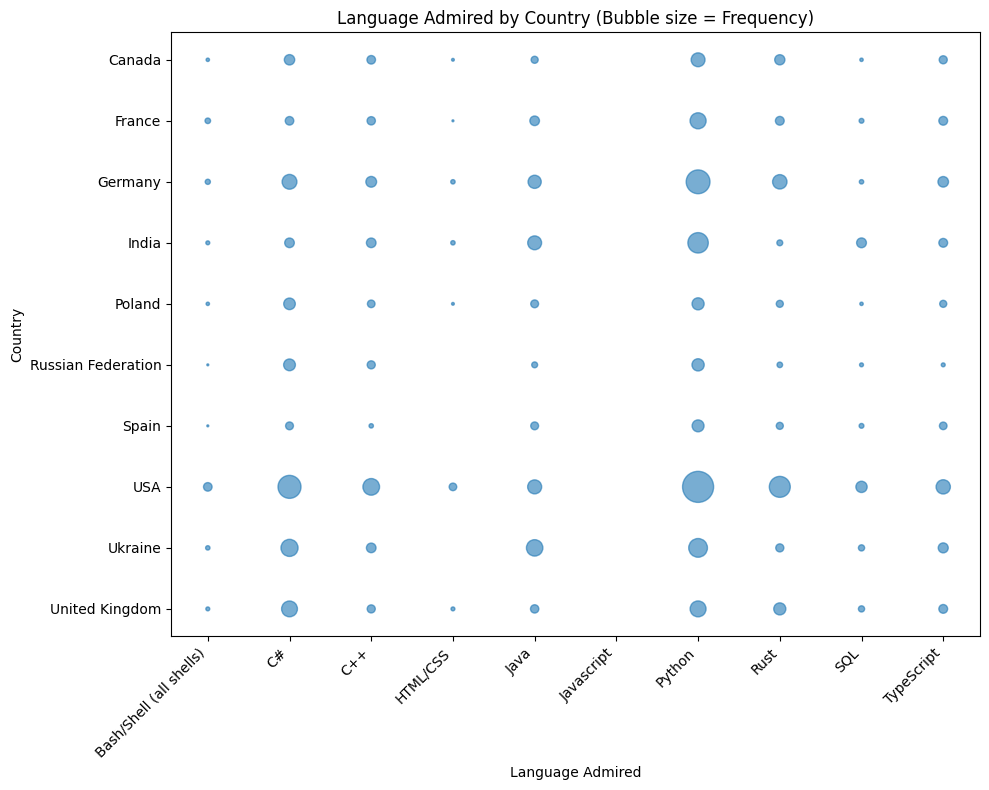

In [10]:
df_lang_country = df[['LanguageAdmired', 'Country']]

# split, explode and count tools
lang_counts = (
    df_lang_country['LanguageAdmired']
    .str.split(';')
    .explode()
    .str.strip()        # clean whitespace
    .value_counts()
    .head(10)
    .index
)

df_lang_country = df_lang_country[df_lang_country['LanguageAdmired'].isin(lang_counts)] # retain top 10 databases

lang_order = {
    "Bash/Shell (all shells)": 1,
    "C#": 2,
    "C++": 3,
    "HTML/CSS": 4,
    "Java": 5,
    "Javascript": 6,
    "Python": 7,
    "Rust": 8,
    "SQL": 9,
    "TypeScript": 10
}

df_lang_country["Lang_order"] = df_lang_country["LanguageAdmired"].map(lang_order)

# rename countries
df_lang_country['Country'] = df_lang_country['Country'].replace({
    'United Kingdom of Great Britain and Northern Ireland':
        'United Kingdom',
    'United States of America':
        'USA'
})

country_counts  = (
    df_lang_country['Country']
    .value_counts()
    .head(10)
    .index
)

country_order = {
    "United Kingdom": 1,
    "Ukraine": 2,
    "USA": 3,
    "Spain": 4,
    "Russian Federation": 5,
    "Poland": 6,
    "India": 7,
    "Germany": 8,
    "France": 9,
    "Canada": 10
}

df_lang_country = df_lang_country[df_lang_country['Country'].isin(country_counts)] # restrict dataset to top 5 roles
df_lang_country["Country_order"] = df_lang_country["Country"].map(country_order)
df_lang_country = df_lang_country.dropna() # drop nulls

# create counts
df_lang_country = (
    df_lang_country
    .groupby(['Lang_order', 'Country_order'])
    .agg(
        count=('Lang_order', 'size')
    )
    .reset_index()
)

# create bubble chart
plt.figure(figsize=(10, 8))

lang_country = plt.scatter(
    df_lang_country["Lang_order"],
    df_lang_country["Country_order"],
    s=df_lang_country["count"] * 2, # double count to differentiate bubble sizes
    alpha=0.6
)

plt.xticks(list(lang_order.values()), list(lang_order.keys()), rotation=45, ha="right")
plt.yticks(list(country_order.values()), list(country_order.keys()))
plt.xlabel("Language Admired")
plt.ylabel("Country")
plt.title("Language Admired by Country (Bubble size = Frequency)")

plt.tight_layout()
plt.show()

## Final Step: Review


After completing the lab, you will have extensively used bubble plots to gain insights into developer community preferences, demographics, compensation trends, and job satisfaction.


## Summary


After completing this lab, you will be able to:

- Create and interpret bubble plots to analyze relationships and compositions within datasets.

- Use bubble plots to explore developer preferences, compensation trends, and satisfaction levels.

- Apply bubble plots to visualize complex relationships involving multiple dimensions effectively.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2024-10-29|1.2|Madhusudhan Moole|Updated lab|
|2024-10-16|1.1|Madhusudhan Moole|Updated lab|
|2024-10-15|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
